## Remove cancer type experiments

In our previous experiments, we were comparing pancancer mutation prediction (train a model on all cancer types, then test on a single cancer type) with single-cancer mutation prediction (train and test on the same single cancer type).

Here, we want to find out what happens to performance when we remove the relevant cancer type from the pancancer training set (i.e. train on all cancer types minus the one we test on). We plan to compare this with the pancancer results, under the assumption that this should be detrimental to performance.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
single_cancer_dir = os.path.join(cfg.results_dir, 'single_cancer')
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
remove_cancer_dir = os.path.join(cfg.results_dir, 'pancancer_only')

In [3]:
single_cancer_df = au.load_prediction_results(single_cancer_dir, 'single_cancer')
print(single_cancer_df.shape)
single_cancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99987,0.99879,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.72689,0.46638,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.72844,0.38910,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99860,0.98630,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.74887,0.48700,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [4]:
pancancer_df = au.load_prediction_results(pancancer_dir, 'pancancer')
print(pancancer_df.shape)
pancancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.95820,0.68399,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.69619,0.40796,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.62527,0.20878,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.98367,0.82884,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77170,0.44885,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [5]:
remove_cancer_df = au.load_prediction_results(remove_cancer_dir, 'pancancer_only')
print(remove_cancer_df.shape)
remove_cancer_df.head()

(10104, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.97197,0.631140,MAP3K1,BRCA,signal,42,train,0,pancancer_only,MAP3K1_BRCA
1,0.42925,0.096007,MAP3K1,BRCA,signal,42,test,0,pancancer_only,MAP3K1_BRCA
2,0.66176,0.086703,MAP3K1,BRCA,signal,42,cv,0,pancancer_only,MAP3K1_BRCA
3,0.97197,0.631140,MAP3K1,BRCA,signal,42,train,1,pancancer_only,MAP3K1_BRCA
4,0.53291,0.107480,MAP3K1,BRCA,signal,42,test,1,pancancer_only,MAP3K1_BRCA


In [6]:
experiment_comparison_df = au.compare_results(single_cancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=True,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head()

,identifier,delta_mean,p_value,corr_pval,reject_null
81,BRAF_THCA,-0.449780,7.127790e-08,0.000030,True
359,SF3B1_UVM,-0.792857,3.991205e-06,0.000475,True
183,CDH1_BRCA,-0.381885,4.076015e-06,0.000475,True
251,PBRM1_KIRC,-0.422218,5.060010e-06,0.000475,True
321,IDH1_LGG,-0.196555,5.690185e-06,0.000475,True


In [7]:
single_cancer_comparison_df = pd.read_csv(os.path.join(cfg.results_dir, 'single_cancer_pvals.tsv'),
                                          index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(single_cancer_comparison_df.index)
sc_experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=single_cancer_comparison_df.reject_null)
)
sc_experiment_sig_df.sort_values(by='p_value').head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null
81,BRAF_THCA,-0.449780,7.127790e-08,0.000030,True,False
359,SF3B1_UVM,-0.792857,3.991205e-06,0.000475,True,True
183,CDH1_BRCA,-0.381885,4.076015e-06,0.000475,True,False
251,PBRM1_KIRC,-0.422218,5.060010e-06,0.000475,True,True
321,IDH1_LGG,-0.196555,5.690185e-06,0.000475,True,False
261,AXIN1_LIHC,-0.549767,7.700354e-06,0.000535,True,False
178,CIC_LGG,-0.585253,1.024162e-05,0.000541,True,False
327,JAK2_HNSC,-0.507661,1.038017e-05,0.000541,True,False
132,SPOP_PRAD,-0.680297,1.274338e-05,0.000590,True,True
254,KDM5C_KIRC,-0.475431,1.735270e-05,0.000724,True,False


Text(0.5, 1.0, 'Comparison of pan-cancer and single-cancer results, Vogelstein genes')

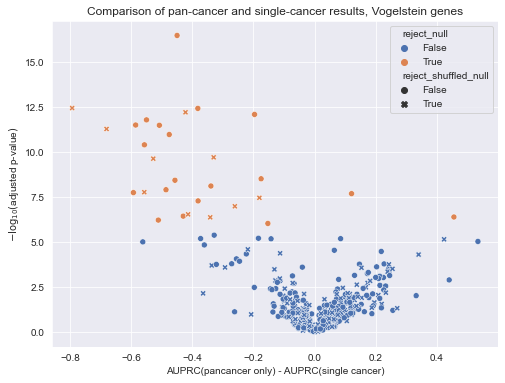

In [8]:
sc_experiment_sig_df['nlog10_p'] = -np.log(sc_experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=sc_experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                style='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(single cancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of pan-cancer and single-cancer results, Vogelstein genes')

In [9]:
experiment_comparison_df = au.compare_results(pancancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=True,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head()

,identifier,delta_mean,p_value,corr_pval,reject_null
81,BRAF_THCA,-0.433592,2.815026e-07,0.000117,True
359,SF3B1_UVM,-0.792857,3.991205e-06,0.000569,True
246,TSC1_BLCA,-0.480847,4.091193e-06,0.000569,True
28,KIT_TGCT,-0.577287,1.082450e-05,0.001128,True
327,JAK2_HNSC,-0.514288,2.669630e-05,0.002226,True


In [10]:
pancancer_comparison_df = pd.read_csv(os.path.join(cfg.results_dir, 'pancancer_pvals.tsv'),
                                      index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(pancancer_comparison_df.index)
experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=pancancer_comparison_df.reject_null)
)
experiment_sig_df.sort_values(by='corr_pval').head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null
81,BRAF_THCA,-0.433592,2.815026e-07,0.000117,True,False
246,TSC1_BLCA,-0.480847,4.091193e-06,0.000569,True,False
359,SF3B1_UVM,-0.792857,3.991205e-06,0.000569,True,False
28,KIT_TGCT,-0.577287,1.082450e-05,0.001128,True,False
327,JAK2_HNSC,-0.514288,2.669630e-05,0.002226,True,True
183,CDH1_BRCA,-0.372273,6.879986e-05,0.004782,True,True
136,FUBP1_LGG,-0.532884,8.234814e-05,0.004906,True,True
178,CIC_LGG,-0.539447,1.449188e-04,0.007101,True,True
321,IDH1_LGG,-0.171603,1.532609e-04,0.007101,True,True
232,MAP3K1_BRCA,-0.268768,1.979826e-04,0.008256,True,False


Text(0.5, 1.0, 'Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

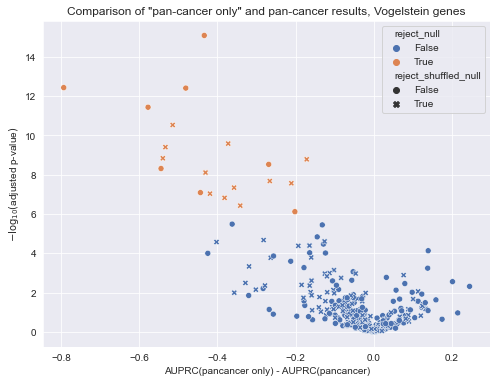

In [11]:
experiment_sig_df['nlog10_p'] = -np.log(experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                style='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(pancancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

Text(0.5, 1.0, 'Highlight BRAF_THCA in comparison plot')

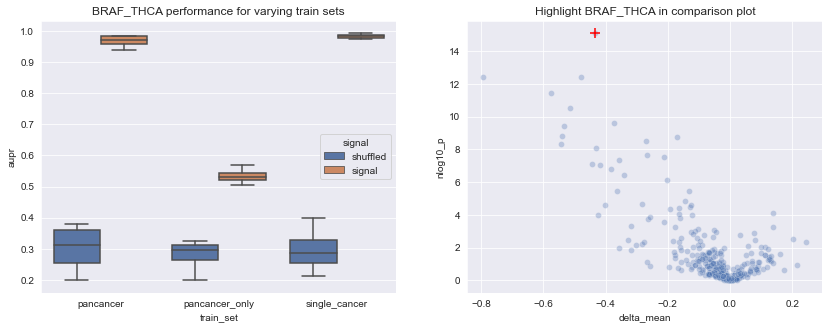

In [12]:
# this is a case where pancancer + THCA comfortably outperforms pancancer without THCA
plot_identifier = 'BRAF_THCA'

# this is a case where pancancer + SKCM slightly outperforms pancancer without SKCM
# but a single-cancer model trained on SKCM alone does best
# plot_identifier = 'BRAF_SKCM'

# these are two cases where pancancer without relevant cancer type does better
# (neither is statistically significant, though)
# plot_identifier = 'NF1_GBM'
# plot_identifier = 'GNAS_BRCA'

results_df = pd.concat((
    single_cancer_df, pancancer_df, remove_cancer_df
))
plot_df = results_df[
    (results_df.identifier == plot_identifier) &
    (results_df.data_type == 'test')
].sort_values(by=['signal', 'train_set'])

sns.set({'figure.figsize': (14, 5)})
fig, axarr = plt.subplots(1, 2)
sns.boxplot(data=plot_df, x='train_set', y='aupr', hue='signal', ax=axarr[0])
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p',
                alpha=0.3, ax=axarr[1])

def highlight_id(x, y, val, ax, id_to_plot):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == id_to_plot:
            ax.scatter(point['x'], point['y'], color='red', marker='+', s=100)
        
highlight_id(experiment_sig_df.delta_mean, experiment_sig_df.nlog10_p,
             experiment_sig_df.identifier, axarr[1], plot_identifier)

axarr[0].set_title('{} performance for varying train sets'.format(plot_identifier))
axarr[1].set_title('Highlight {} in comparison plot'.format(plot_identifier))

In [13]:
experiment_sig_df.sort_values(by='delta_mean', ascending=False).head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null,nlog10_p
198,KDM6A_ESCA,0.244844,0.098025,0.648833,False,False,2.322531
262,RB1_SKCM,0.214560,0.378233,0.996655,False,False,0.972246
67,MED12_SKCM,0.201201,0.077117,0.584686,False,False,2.562434
54,STAG2_UCEC,0.174582,0.521204,0.996655,False,False,0.651613
237,GNAS_BRCA,0.158850,0.194647,0.842183,False,False,1.636569
332,ATM_UCEC,0.139062,0.015978,0.214931,False,False,4.136538
268,NF1_GBM,0.138690,0.335512,0.977933,False,False,1.092097
140,ATM_LUSC,0.137733,0.038847,0.395099,False,False,3.248134
104,TSHR_UCEC,0.132575,0.308198,0.977933,False,True,1.177014
255,SMAD4_HNSC,0.131510,0.224759,0.859857,False,False,1.492727


Looking at the "volcano plots", we can see that on the whole, models clearly tend to perform worse when the relevant cancer type is removed. This is what we expected to see.

In the above table, looking at the cases where removing the relevant cancer type slightly improves model performance, many of the top results are cancers that are only present in women (e.g. uterine cancer/UCEC, breast cancer/BRCA, ovarian cancer/OV). This isn't always the case, though (ESCA, SKCM, COAD).